In [1]:
%load_ext jupyternotify

#import jupyternotify

import datetime
import pandas as pd
import numpy as np

import time
from datetime import date
from datetime import timedelta
from datetime import datetime

import jenkspy
from jenkspy import JenksNaturalBreaks
from collections import Counter

import random

from scipy.stats import lognorm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 273)
pd.set_option('display.max_rows', 273)

<IPython.core.display.Javascript object>

In [2]:
def lognorm_params(mode, stddev):
    """
    Given the mode and std. dev. of the log-normal distribution, this function
    returns the shape and scale parameters for scipy's parameterization of the
    distribution.
    """
    p = np.poly1d([1, -1, 0, 0, -(stddev/mode)**2])
    r = p.roots
    sol = r[(r.imag == 0) & (r.real > 0)].real
    shape = np.sqrt(np.log(sol))
    scale = mode * sol
    return shape, scale

In [3]:
from jenks import jenks
import numpy as np
def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenks(array, classes)
    if len(classes) >= 20:
        gvf = 0.85
        

    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])

    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

40.07517
2959


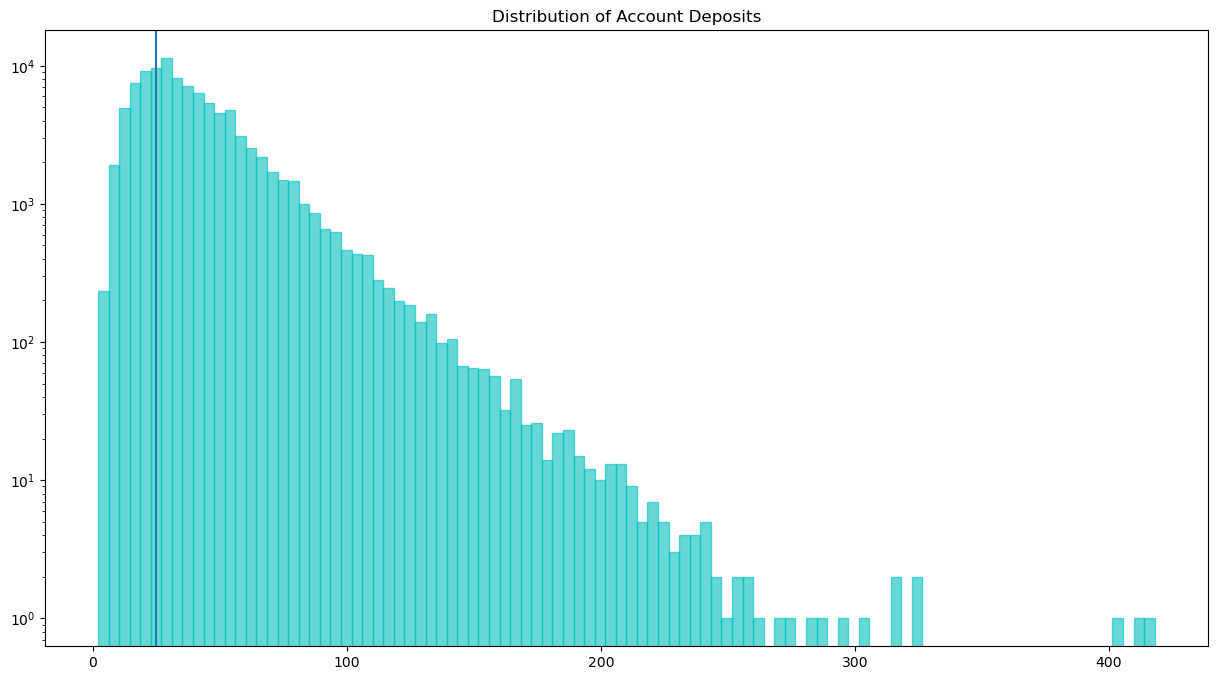

In [4]:
mode = 25
stddev = 25 #1

sigma, scale = lognorm_params(mode, stddev)
sample = lognorm.rvs(sigma, 0, scale, size=int(100000)) 
sample = sample.astype(int)
print (np.mean(sample))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

tmp = plt.hist(sample, bins=100, alpha=0.6, color='c', ec='c')
plt.title('Distribution of Account Deposits')
#plt.xlim(0, 1)

plt.axvline(mode)
plt.yscale('log')

# plotting the people with more than 100 alters
k = sample[sample > 100]
print (len(k))

# fig, ax = plt.subplots()
# fig.set_size_inches(15, 8, forward=True)
# tmp = plt.hist(k, bins=100, alpha=0.6, color='c', ec='c')
# plt.yscale('log')

In [ ]:
%%time
deg_prob = []
for degree in sorted(pd.DataFrame(sample)[0].unique()):
    # print (num_neigh)
    deg_prob.append((len([deg for deg in sample if deg == degree])/len(sample)))

In [15]:
x = sorted(pd.DataFrame(sample)[0].unique())

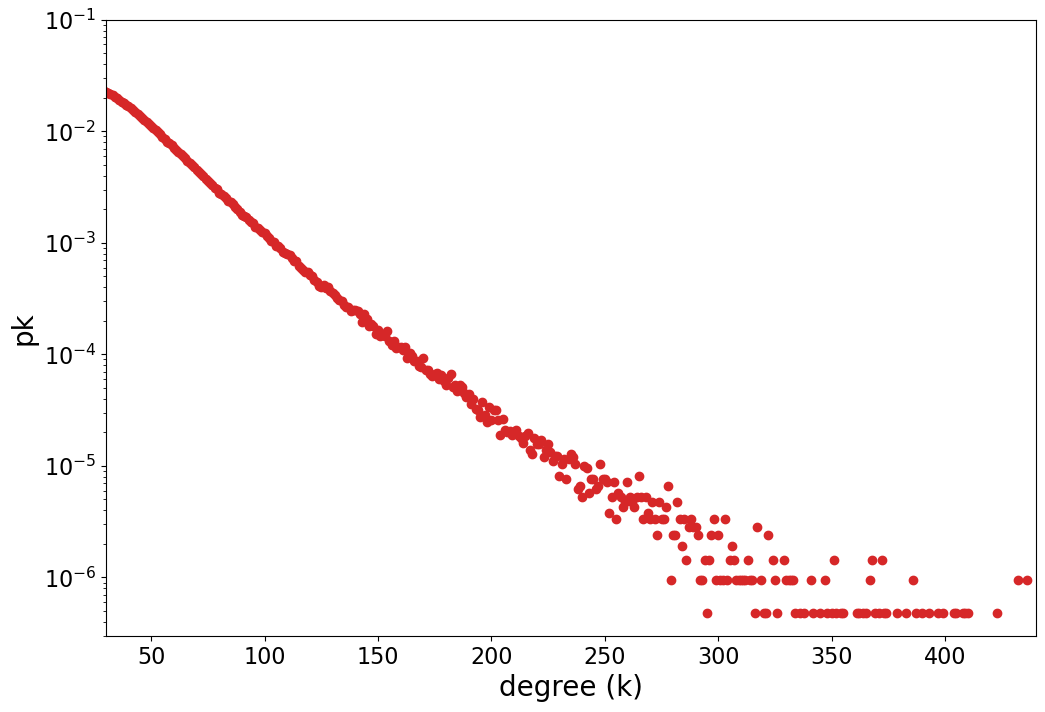

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)

plt.scatter(x, deg_prob, c= 'tab:red')
plt.xlim(30, 440)
plt.ylim(3e-7, 0.1)
plt.xlabel('degree (k)', fontsize = 20)
plt.ylabel('pk', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.yscale('log')
plt.show()

In [5]:
# %%time
# sub_calls_list = []
# sub_total_calls = []
# for sub in sample[:100000]:
#     a = random.gauss(150, 20)  # controls value at x = 1,  set at mean = 20
#     b = abs(random.gauss(0.5, 0.25))**1   # controls how steeply it falls away, set at mean = 2

#     alter_call_count_list = []
#     for i in range(1,1+sub):
#         #print (((i*a)**-b)[0])
#         #i += random.randint(0, 1)*i*0.3
#         y = (a*(i**-b))   # count calls by sub to an alter
#         y += abs(random.gauss(0, y*0.03))   # noise added to count calls, proportionate to the count
#         #y += abs(random.randint(0, 1)*random.gauss(0, y*16))
#         alter_call_count_list.append(int(y))   # countof calls to each alter by a sub, in descending order
        
#     sub_calls_list.append(alter_call_count_list)
#     sub_total_calls.append(np.sum(alter_call_count_list))

# # plt.plot(range(1,1+k[0]),call_count_list)

# # #plt.xscale('log')
# # plt.yscale('log')

# # print (call_count_list)
# # print (a)
# # print (b)

# plt.hist(sub_total_calls, bins=100, alpha=0.6, color='c', ec='c')
# plt.xlim(-1000, 15000)
# plt.show()

# plt.hist(np.log10(sub_total_calls), bins=100, alpha=0.6, color='c', ec='c')
# plt.show()

In [6]:
# plt.plot(range(len(sub_calls_list[1])), sub_calls_list[1])
# plt.yscale('log')

20.199971076291614
0.27762651598906196


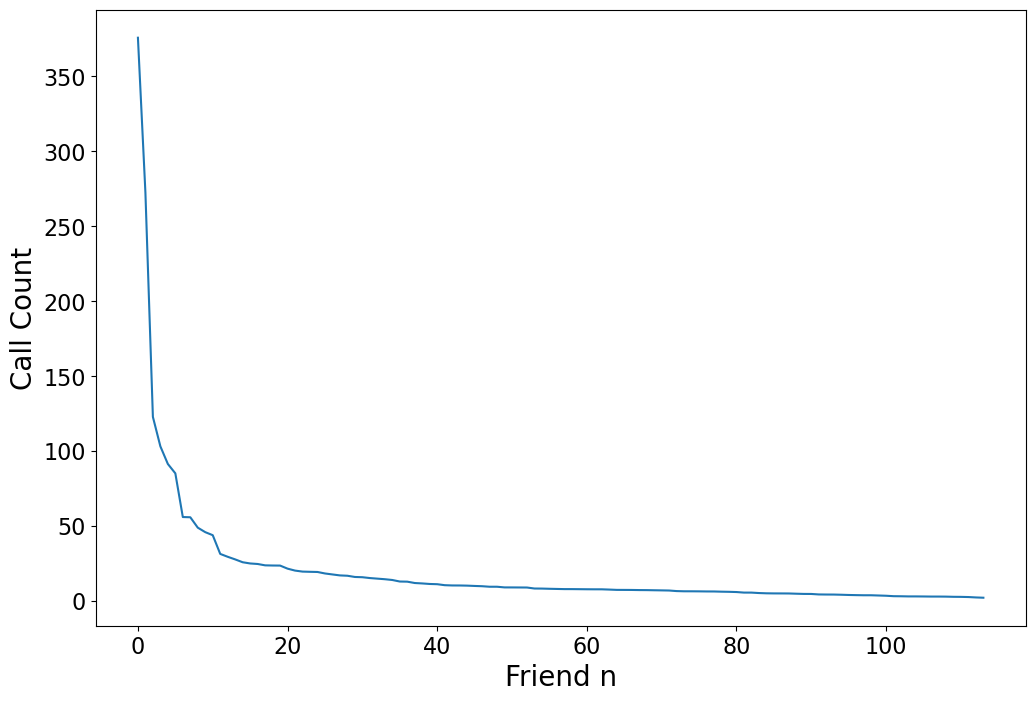

Wall time: 673 ms


In [16]:
%%time
sub_calls_list = []
sub_total_calls = []
a_list = []
b_list = []

for sub in k[:3000]:
    a = random.gauss(150, 20)  # controls value at x = 1,  set at mean = 20
    b = abs(random.gauss(0.85, 0.15))**1   # controls how steeply it falls away, set at mean = 2
    a_list.append(a)
    b_list.append(b)

    alter_call_count_list = []
    for i in range(1,1+sub):
        #print (((i*a)**-b)[0])
        #i += random.randint(0, 1)*i*0.3
        y = (a*(i**-b))   # count calls by sub to an alter
        y += abs(random.gauss(0, y*1.5))   # noise added to count calls, proportionate to the count
        #y += abs(random.randint(0, 1)*random.gauss(0, y*16))
        alter_call_count_list.append(y)   # countof calls to each alter by a sub, in descending order
        
    sub_calls_list.append(np.round(alter_call_count_list,5))
    sub_total_calls.append(np.sum(alter_call_count_list))

# plt.plot(range(1,1+k[0]),call_count_list)

# #plt.xscale('log')
# plt.yscale('log')

# print (call_count_list)
# print (a)
# print (b)

# plt.hist(sub_total_calls, bins=100, alpha=0.6, color='c', ec='c')
# #plt.xscale('log')
# plt.show()

print (np.std(a_list))
print (np.min(b_list))

fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
plt.plot(range(len(sub_calls_list[1])), sorted(sub_calls_list[1], reverse=True))
#plt.yscale('log')
plt.xlabel('Friend n', fontsize = 20)
plt.ylabel('Call Count', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

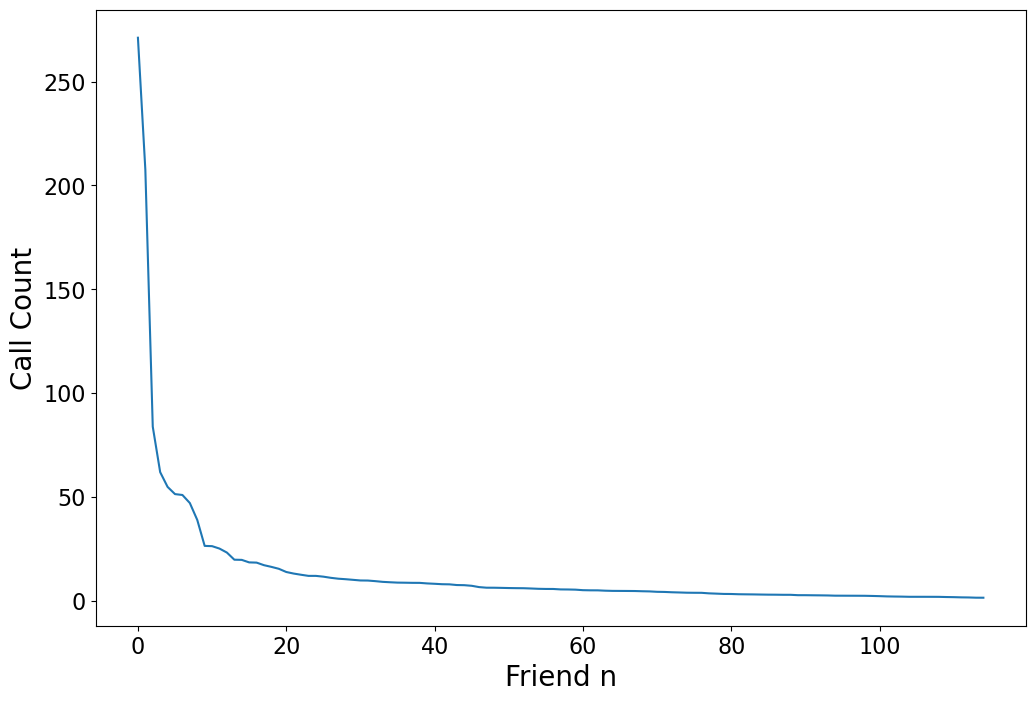

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
plt.plot(range(len(sub_calls_list[2])), sorted(sub_calls_list[2], reverse=True))
#plt.yscale('log')
plt.xlabel('Friend n', fontsize = 20)
plt.ylabel('Call Count', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\3147979497.py:26: RuntimeWarning: Mean of empty slice.
  sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


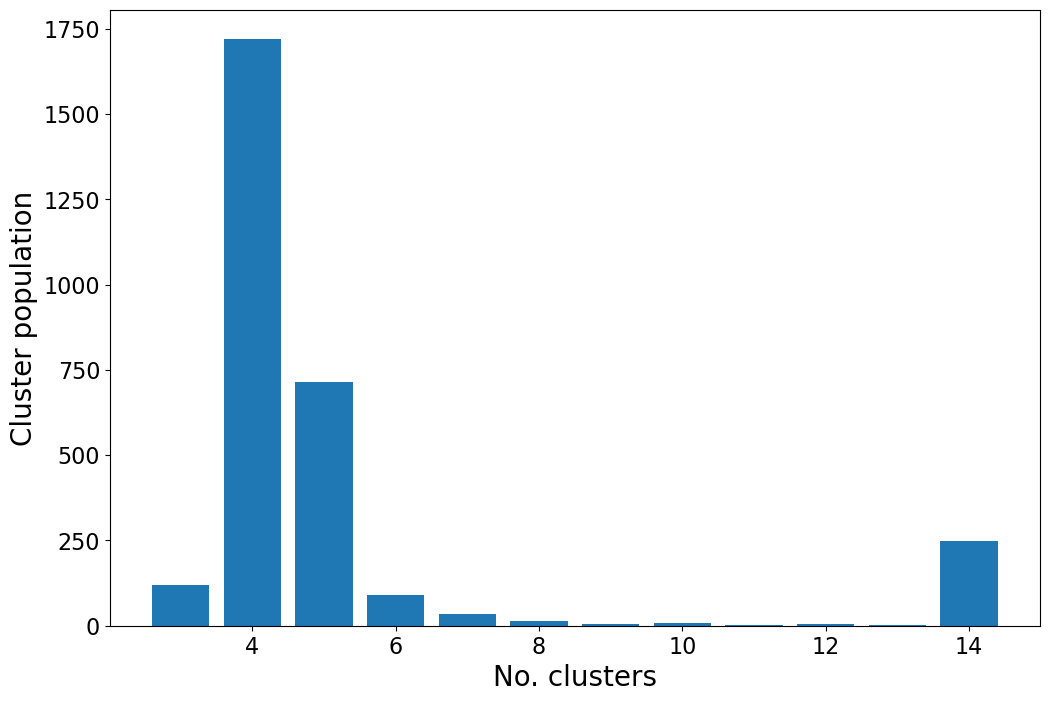

Wall time: 4.09 s


In [24]:
%%time
nclasses_list = []

for i in range(len(sub_calls_list)):
# for i in range(3000):
    gvf = 0.0
    nclasses = 2
    while gvf < .85 and nclasses < 14:
        gvf = goodness_of_variance_fit(np.asarray(sorted(sub_calls_list[i], reverse=True)), nclasses)
        nclasses += 1
    nclasses_list.append(nclasses)

fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
plt.bar(pd.DataFrame(nclasses_list).reset_index().groupby(0).count().index,pd.DataFrame(nclasses_list).reset_index().groupby(0).count()['index'].values)
plt.xlabel('No. clusters', fontsize = 20)
plt.ylabel('Cluster population', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [8]:
%%time
cluster_size_list_list = []   
    
for i in range(len(sub_calls_list)):
    
    cluster_size_list = []

    x = np.asarray(sub_calls_list[i])
    breaks = jenks(np.asarray(sub_calls_list[i]), nclasses_list[i])

    for j in range(nclasses_list[i]):
        cluster_size = len(sorted(x[(x >= breaks[j]) & (x < breaks[j+1])]))
        if cluster_size == 0:
            cluster_size = 1
        cluster_size_list.append(cluster_size)
    #cluster_size_list.append(1)
    cluster_size_list.reverse()
    
    cluster_size_list_list.append(cluster_size_list)

Wall time: 4.31 s


In [97]:
# cluster_size_list_list_3 = []

# for cluster_size_list in cluster_size_list_list:
#     if len(cluster_size_list) == 3:
#         cluster_size_list_list_3.append(cluster_size_list)

# mean_cluster_size_3_list = []

# for i in range(3):
    
#     def Extract(lst):
#         return [item[i] for item in lst]
#     # Driver code
#     mean_cluster_size_3_list.append(np.mean(Extract(cluster_size_list_list_3)))

# print (mean_cluster_size_3_list)

# print (mean_cluster_size_3_list[1]/mean_cluster_size_3_list[0])
# print (mean_cluster_size_3_list[2]/mean_cluster_size_3_list[1])

In [10]:
cluster_size_list_list_4 = []

for cluster_size_list in cluster_size_list_list:
    if len(cluster_size_list) == 4:
        cluster_size_list_list_4.append(cluster_size_list)

mean_cluster_size_4_list = []

for i in range(4):
    
    def Extract(lst):
        return [item[i] for item in lst]
    # Driver code
    mean_cluster_size_4_list.append(np.mean(Extract(cluster_size_list_list_4)))

print (mean_cluster_size_4_list)

print (mean_cluster_size_4_list[1]/mean_cluster_size_4_list[0])
print (mean_cluster_size_4_list[2]/mean_cluster_size_4_list[1])
print (mean_cluster_size_4_list[3]/mean_cluster_size_4_list[2])

[1.3139772395681355, 3.5634665888532244, 14.197986577181208, 129.43478260869566]
2.7119697979125026
3.984318702915165
9.116418155847626


In [96]:
cluster_size_list_list_5 = []

for cluster_size_list in cluster_size_list_list:
    if len(cluster_size_list) == 5:
        cluster_size_list_list_5.append(cluster_size_list)

mean_cluster_size_5_list = []

for i in range(5):
    
    def Extract(lst):
        return [item[i] for item in lst]
    # Driver code
    mean_cluster_size_5_list.append(np.mean(Extract(cluster_size_list_list_5)))

print (mean_cluster_size_5_list)

print (mean_cluster_size_5_list[1]/mean_cluster_size_5_list[0])
print (mean_cluster_size_5_list[2]/mean_cluster_size_5_list[1])
print (mean_cluster_size_5_list[3]/mean_cluster_size_5_list[2])
print (mean_cluster_size_5_list[4]/mean_cluster_size_5_list[3])

[1.4424845186714206, 2.3721148433101895, 6.816100581722649, 24.082379433289546, 128.3760555451304]
1.6444646806296344
2.8734277351475357
3.5331608072020484
5.33070479604161


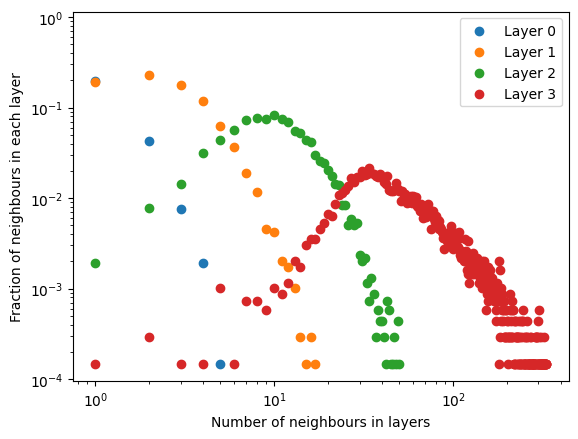

Wall time: 4.88 s


In [92]:
layer_res = []
for layer in range(4):
    temp = []
    for num_neigh in sorted(pd.DataFrame(np.asarray(cluster_size_list_list_4)[:,layer])[0].unique()):
        # print (num_neigh)
        temp.append((len([num for num in np.asarray(cluster_size_list_list_4)[:,layer] if num == num_neigh])/len(np.asarray(cluster_size_list_list_4)[:,layer])))
        
    layer_res.append(temp)

fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
    
for i in range(4):
    plt.scatter(np.arange(len(layer_res[i])), layer_res[i], marker = 'o', label = 'Layer '+str(i))
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of neighbours in layers', fontsize = 20)
    plt.ylabel('Fraction of neighbours in each layer', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
plt.show()

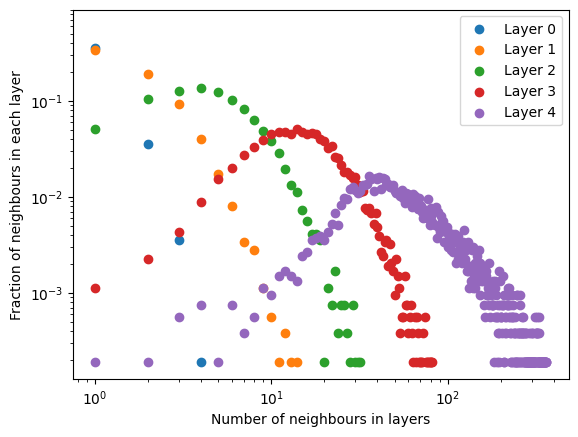

Wall time: 4.89 s


In [95]:
layer_res = []
for layer in range(5):
    temp = []
    for num_neigh in sorted(pd.DataFrame(np.asarray(cluster_size_list_list_5)[:,layer])[0].unique()):
        # print (num_neigh)
        temp.append((len([num for num in np.asarray(cluster_size_list_list_5)[:,layer] if num == num_neigh])/len(np.asarray(cluster_size_list_list_5)[:,layer])))
        
    layer_res.append(temp)

fig, ax = plt.subplots()
fig.set_size_inches(12, 12, forward=True)

for i in range(5):
    plt.scatter(np.arange(len(layer_res[i])), layer_res[i], marker = 'o', label = 'Layer '+str(i))
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of neighbours in layers', fontsize = 20)
    plt.ylabel('Fraction of neighbours in each layer', fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
plt.show()

In [12]:
print (np.mean(np.asarray(cluster_size_list_list_4)[:,0]))
print (np.mean(np.asarray(cluster_size_list_list_4)[:,1]))
print (np.mean(np.asarray(cluster_size_list_list_4)[:,2]))
print (np.mean(np.asarray(cluster_size_list_list_4)[:,3]))

1.3139772395681355
3.5634665888532244
14.197986577181208
129.43478260869566


<BarContainer object of 6 artists>

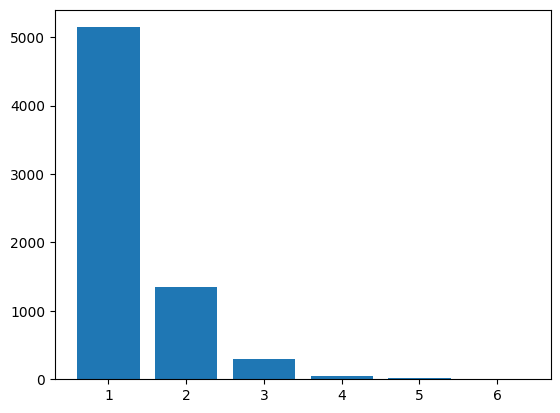

In [13]:
plt.bar(list(set(np.asarray(cluster_size_list_list_4)[:,0])),pd.DataFrame(list(np.asarray(cluster_size_list_list_4)[:,0])).reset_index().groupby(0).count()['index'].values)

<BarContainer object of 18 artists>

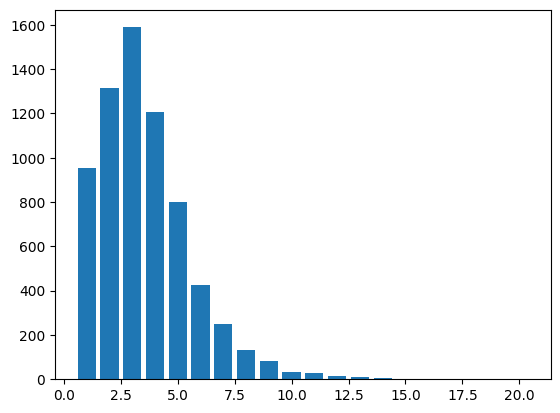

In [14]:
plt.bar(list(set(np.asarray(cluster_size_list_list_4)[:,1])),pd.DataFrame(list(np.asarray(cluster_size_list_list_4)[:,1])).reset_index().groupby(0).count()['index'].values)

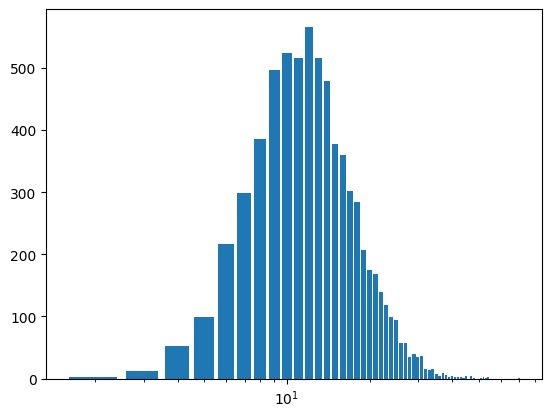

In [15]:
plt.bar(list(set(np.asarray(cluster_size_list_list_4)[:,2])),pd.DataFrame(list(np.asarray(cluster_size_list_list_4)[:,2])).reset_index().groupby(0).count()['index'].values)
plt.xscale('log')

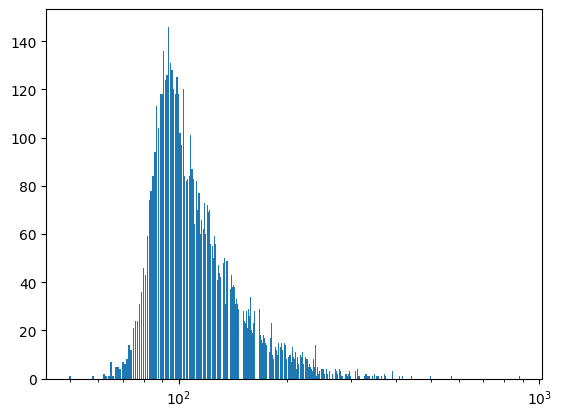

In [16]:
plt.bar(list(set(np.asarray(cluster_size_list_list_4)[:,3])),pd.DataFrame(list(np.asarray(cluster_size_list_list_4)[:,3])).reset_index().groupby(0).count()['index'].values)
plt.xscale('log')

In [17]:
cluster_size_list_list_5 = []

for cluster_size_list in cluster_size_list_list:
    if len(cluster_size_list) == 5:
        cluster_size_list_list_5.append(cluster_size_list)

mean_cluster_size_5_list = []

for i in range(5):
    
    def Extract(lst):
        return [item[i] for item in lst]
    # Driver code
    mean_cluster_size_5_list.append(np.mean(Extract(cluster_size_list_list_5)))

print (mean_cluster_size_5_list)

print (mean_cluster_size_5_list[1]/mean_cluster_size_5_list[0])
print (mean_cluster_size_5_list[2]/mean_cluster_size_5_list[1])
print (mean_cluster_size_5_list[3]/mean_cluster_size_5_list[2])
print (mean_cluster_size_5_list[4]/mean_cluster_size_5_list[3])

[1.4424845186714206, 2.3721148433101895, 6.816100581722649, 24.082379433289546, 128.3760555451304]
1.6444646806296344
2.8734277351475357
3.5331608072020484
5.33070479604161


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000'),
  Text(0, 8000.0, '8000')])

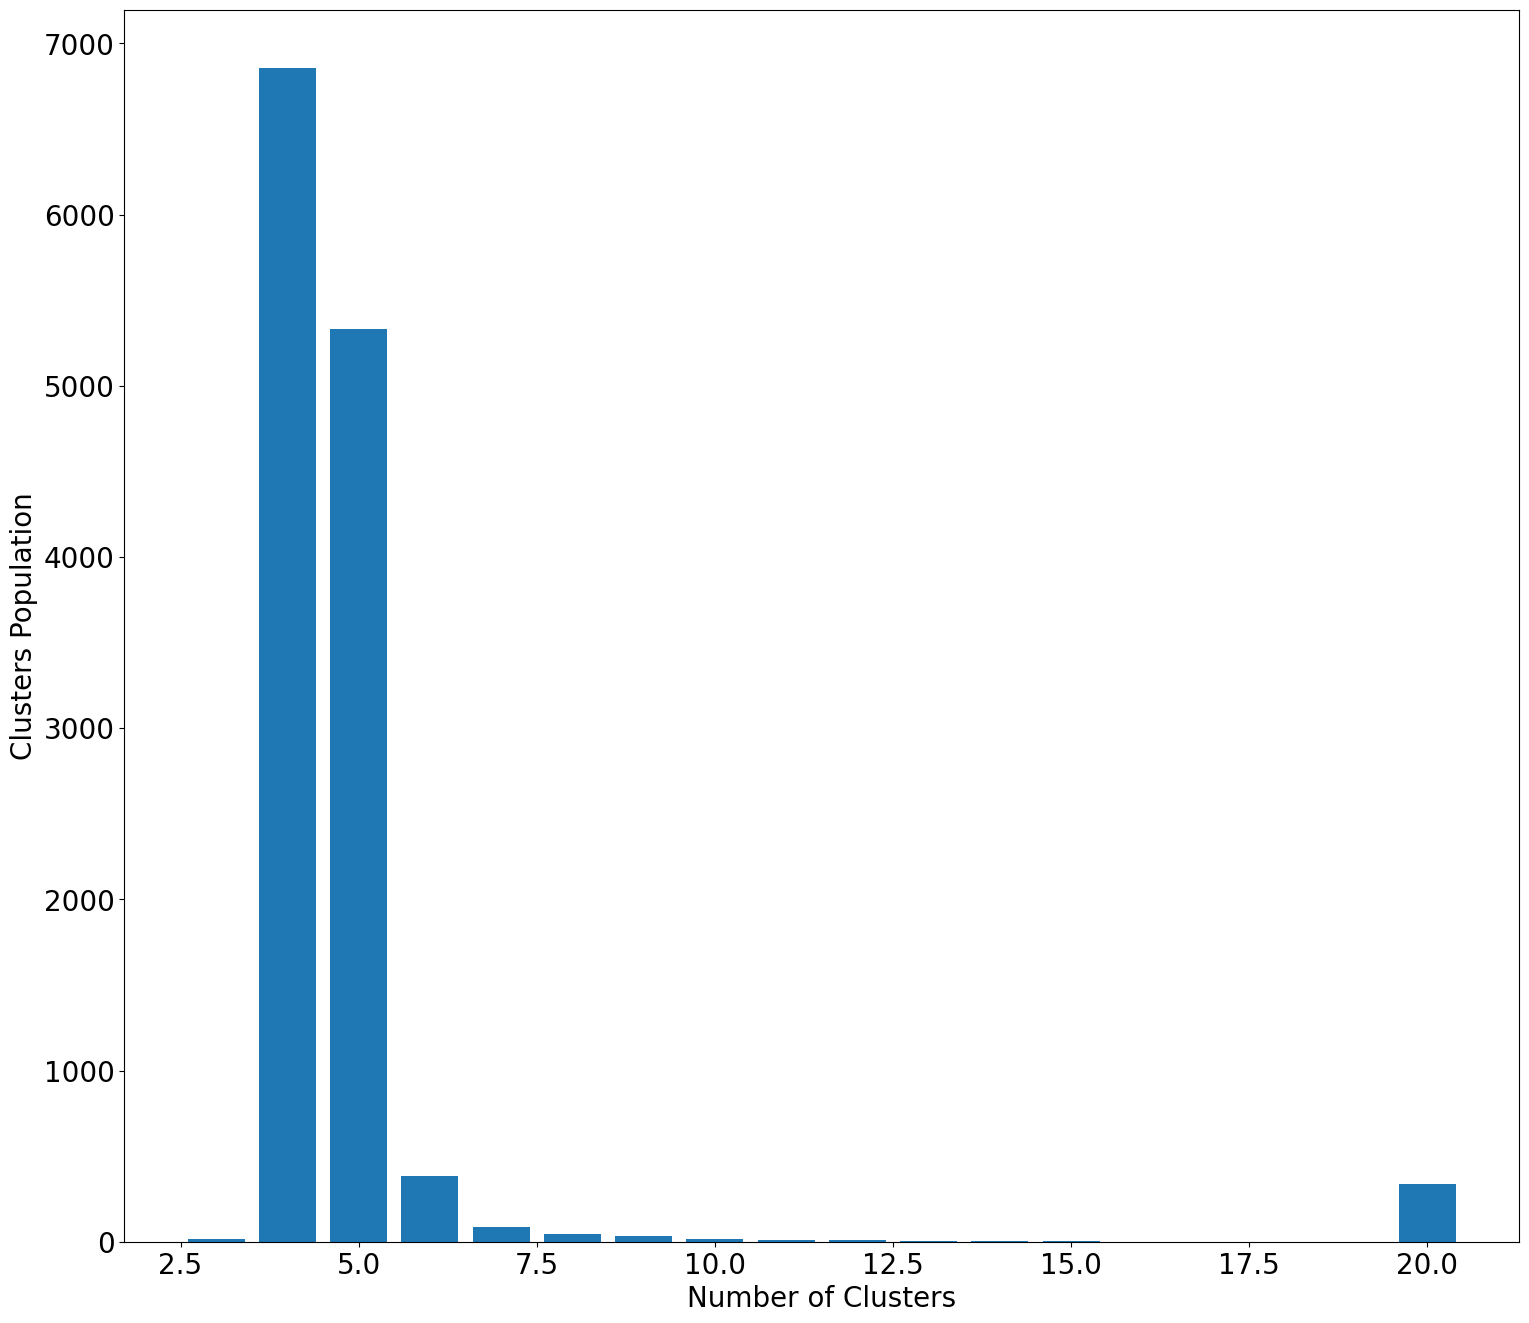

In [18]:
plt.figure(figsize=(18,16))
plt.bar(pd.DataFrame(nclasses_list).reset_index().groupby(0).count().index,pd.DataFrame(nclasses_list).reset_index().groupby(0).count()['index'].values)
plt.xlabel("Number of Clusters", fontsize = 20)
plt.ylabel("Clusters Population", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [19]:
from sklearn.mixture import GaussianMixture

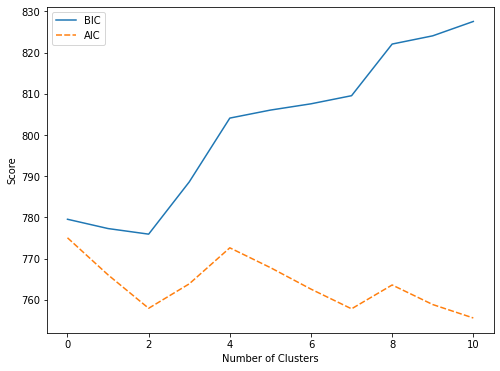

In [41]:
i = random.randint(0, len(sub_calls_list))

n_components = np.arange(1, 12)
models = [GaussianMixture(n, 
                          covariance_type='full', random_state=0).fit(np.asarray(sub_calls_list[i]).reshape(-1, 1)) for n in n_components]


#models

gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,
                                  "BIC" : [m.bic(np.asarray(sub_calls_list[i]).reshape(-1, 1)) for m in models],
                                   "AIC" : [m.aic(np.asarray(sub_calls_list[i]).reshape(-1, 1)) for m in models]})

plt.figure(figsize=(8,6))
sns.lineplot(data=gmm_model_comparisons[["BIC","AIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.savefig("GMM_model_comparison_with_AIC_BIC_Scores_Python.png",
                    format='png',dpi=150)

In [253]:
!pip install jenkspy

You should consider upgrading via the 'C:\Users\Admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [256]:
breaks = jenkspy.jenks_breaks(sub_calls_list[0], nb_class=6)
breaks

[22.969859809397672,
 31.19265092944758,
 43.27977787888272,
 59.750138870758775,
 82.90326924787068,
 109.68465989035042,
 145.11761386986373]

In [261]:
try:
    print(jnb.labels_)
    print(jnb.groups_)
    print(jnb.inner_breaks_)
except:
    pass

In [ ]:
jnb.fit([0,0,0,1,1,1,1,1,2,2])
try:
    print(jnb.labels_)
    print(jnb.groups_)
    print(jnb.inner_breaks_)
except:
    pass

In [ ]:
len(Counter(jnb.labels_).values())

In [ ]:
jnb = JenksNaturalBreaks()

count_clusters_list = []
count_alters_in_cluster_list = []

for sub in sub_calls_list:
    jnb.fit(sub)
    # try:
    #     print(jnb.labels_)
    #     print(jnb.groups_)
    #     print(jnb.inner_breaks_)
    # except:
    #     pass
    
    count_clusters_list.append(len(Counter(jnb.labels_).values()))   # count of clusters
    count_alters_in_cluster_list.append(Counter(jnb.labels_).values())  # count of alters in each cluster

#     print (len(Counter(jnb.labels_).values()))   # count of clusters
#     print (Counter(jnb.labels_).values())   # count of alters in each cluster

print (np.min(count_clusters_list))
print (np.max(count_clusters_list))

(array([63., 18.,  6.,  4.,  2.,  1.,  0.,  1.,  0.,  1.]),
 array([ 22.96985981,  35.18463522,  47.39941062,  59.61418603,
         71.82896143,  84.04373684,  96.25851225, 108.47328765,
        120.68806306, 132.90283846, 145.11761387]),
 <BarContainer object of 10 artists>)

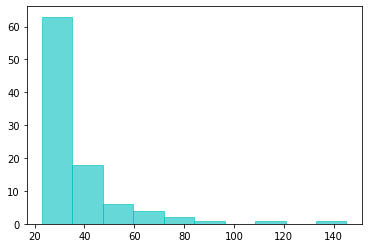

In [249]:
plt.hist(sub_calls_list[0], bins=10, alpha=0.6, color='c', ec='c')

In [245]:
len(sub_calls_list[0])

96

In [ ]:
socfb_A_anon
socfb_Auburn71
socfb-B-anon

In [23]:
from scipy.io import mminfo,mmread
mminfo("socfb-A-anon.mtx")

(3097165, 3097165, 23667394, 'coordinate', 'pattern', 'symmetric')

In [24]:
mmread("socfb-A-anon.mtx")

<3097165x3097165 sparse matrix of type '<class 'numpy.float64'>'
	with 47334788 stored elements in COOrdinate format>